*Analysing Company Descriptions using NLP*

In [ ]:
#import libs
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#mount drive
from google.colab import drive
drive.mount('1LbVccBPxo8pR9C41wosD5qYOglKsDrPr')

Mounted at 1LbVccBPxo8pR9C41wosD5qYOglKsDrPr


In [ ]:
df = pd.read_csv("/content/1LbVccBPxo8pR9C41wosD5qYOglKsDrPr/MyDrive/001_Masterarbeit/2022-12-31_EdTech dataset_cleaned.csv", index_col=0)

<ipython-input-4-ebc2da93ffb4>:1: DtypeWarning: Columns (77,103,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/1LbVccBPxo8pR9C41wosD5qYOglKsDrPr/MyDrive/001_Masterarbeit/2022-12-31_EdTech dataset_cleaned.csv", index_col=0)


In [ ]:
#add numeric index
df = df.reset_index()

In [ ]:
#add the 'ID' column to the original df to enable merging later on
df['ID']=df.index

#Topic Modelling with BERTopic

In [ ]:
pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 12.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_model = CountVectorizer(stop_words="english")
min_cluster_size = 100

In [ ]:
#define model parameters
topic_model = BERTopic(vectorizer_model=vectorizer_model, min_topic_size = min_cluster_size)

In [ ]:
#initiate model
docs = df['Full Description']
topics, probs = topic_model.fit_transform(docs)

In [ ]:
#extract results as a df
df_results = pd.DataFrame(topic_model.get_document_info(docs))

In [ ]:
#add results to cleaned dataset
df = df.join(df_results)

In [ ]:
df[df['Topic']>=0]

,Organization Name,Organization Name URL,Founded Date,Founded Date Precision,Industries,Headquarters Location,Description,CB Rank (Company),Estimated Revenue Range,Operating Status,...,Word Count,ID,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
2,Olyssa,https://www.crunchbase.com/organization/olyssa,07.12.09,day,"Education, Human Resources, Internet","Athens, Attiki, Greece",Educational job finding network,"1,057,344",NaN,Active,...,135,2,There is an obvious gap of communication betwe...,6,6_career_job_talent_candidates,"[career, job, talent, candidates, jobs, employ...",[Find My Profession is an elite career service...,career - job - talent - candidates - jobs - em...,1.000000,False
3,Vaibmu,https://www.crunchbase.com/organization/vaibmu,01.12.09,day,"Classifieds, Consulting, Training","Espoo, Southern Finland, Finland",Vaibmu is a company that provides management c...,"1,615,632",NaN,Active,...,336,3,Vaibmu is a strategic consulting & portfolio d...,3,3_services_solutions_development_business,"[services, solutions, development, business, s...",[Digileap is confident of making its customers...,services - solutions - development - business ...,0.868778,False
4,Low Price Lessons.com,https://www.crunchbase.com/organization/low-pr...,30.11.09,day,"Automotive, E-Commerce, Education","Edinburgh, Edinburgh, City of, United Kingdom",Driving Lesson comparison website,"737,771",Less than $1M,Closed,...,30,4,Low Price Lessons.com is an on-line service th...,8,8_books_reading_book_readers,"[books, reading, book, readers, read, authors,...",[Sellbuybook.com is an Online Portal where peo...,books - reading - book - readers - read - auth...,0.722258,False
7,Locus Assignments,https://www.crunchbase.com/organization/hnd-as...,12.11.09,day,"Consulting, Education, Service Industry","Coventry, Coventry, United Kingdom",HND Assignments UK is now Locus Assignments pr...,"467,170",NaN,Active,...,48,7,Locus Assignments is top class assignment writ...,15,15_writing_writers_essay_assignment,"[writing, writers, essay, assignment, academic...",[Get Assignment Help on Any Topic by their Exp...,writing - writers - essay - assignment - acade...,0.720963,False
8,Graduateland,https://www.crunchbase.com/organization/gradua...,05.11.09,day,"Education, Recruiting, Social Media","Copenhagen, Hovedstaden, Denmark",Graduateland offers a career network for stude...,"60,305",$1M to $10M,Active,...,218,8,Graduateland is Europe's largest career networ...,6,6_career_job_talent_candidates,"[career, job, talent, candidates, jobs, employ...",[Find My Profession is an elite career service...,career - job - talent - candidates - jobs - em...,0.767834,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14037,Pronounce,https://www.crunchbase.com/organization/pronounce,01.05.22,month,"Artificial Intelligence, E-Learning, Education...",NaN,Pronounce is a personalized speech analyzer th...,"978,772",NaN,Active,...,36,14037,Pronounce is a personalized speech analyzer th...,4,4_language_english_learning_languages,"[language, english, learning, languages, speak...",[SkimaTalk is an online language-learning plat...,language - english - learning - languages - sp...,0.363318,False
14038,Skywin IT Academy,https://www.crunchbase.com/organization/skywin...,01.05.22,day,Education,"Surat, Gujarat, India",Skywin IT Academy is higher education academy ...,"1,483,675",NaN,Closed,...,39,14038,"Skywin IT Training, Surat based one of the lea...",19,19_training_sap_software_courses,"[training, sap, software, courses, institute, ...",[Introduction to IICT IICT is a leading Traini...,training - sap - software - courses - institut...,1.000000,False
14041,KidFi,https://www.crunchbase.com/organization/kidfi,28.04.22,day,"Apps, Education, Gamification","Baku, Baki, Azerbaijan",KidFi teaches kids financial literacy and help...,"154,001",NaN,Active,...,53,14041,A gamified mobile application is designed for 

#Bag-of-Word method using 'scikit-learn Random Forest'

The goal is to represent each document (patent) based on the number of times each word occurs in them. We are going to use the Scikit learn (https://scikit-learn.org/stable/index.html) package, which has built-in functions that make this process very easy and straightforward.

This method has been proven to be the best performing in classifing patents mentioning AI by Miric, M., Jia, N. and Huang, K. (Forthcoming) Using Supervised Machine Learning for Large-Scale Classification In Management Research: The Case For Identifying Artificial Intelligence Patents. Strategic Management Journal.  

Link: https://www.milanmiric.com/ai-patents-us


Further Reading:

- short explanation of BOW
 - https://thatascience.com/learn-machine-learning/bag-of-words/
- short explanation of RandomForest classifier
 - https://thatascience.com/learn-machine-learning/build-random-forest/

Convert Text Data to Term-Document Frequency Matrix:


We are going to use the built in sklearn tools to process the text. The idea is to construct a matrix represetantion of the data. The rows represent each document (patent abstract). The columns represent each word that occurs in any of the documents (corpus). The fields of the matrix (TF) represent how often each word occurs in each document.

This is illustrated below.


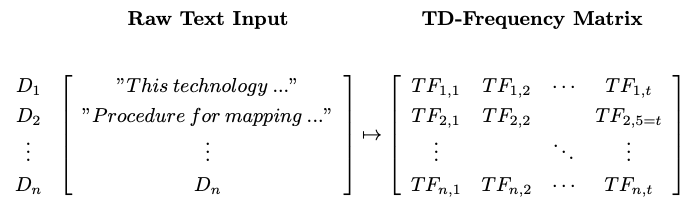




In [ ]:
## import libs

# Sklearn Packages #
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

# Import SkLearn Classifiers #
from sklearn.ensemble import RandomForestClassifier

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#define the text pre-processing
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
import re


lemmatizer = WordNetLemmatizer()

cachedStopWords = set(stopwords.words('english'))
def pre_process(text):
    words = simple_preprocess(text,deacc=True,min_len=3)
    text = [lemmatizer.lemmatize(re.sub('[^A-Za-z]+', ' ', word)) for word in words if not word in cachedStopWords]
    text = ' '.join(map(str,text))
    return text


In [ ]:
#apply pre-process to text of 'Full Description
df['BOW'] = df.apply(lambda row : pre_process(row['Full Description']), axis = 1)

In [ ]:
#additional stopwords based on previous model outputs and update stopwords list
#new_stopwords = ['']
#cachedStopWords = pd.concat(cachedStopWords,new_stopwords)

In [ ]:
# Define Model Parameters #
# Minimum Document Frequency -- Minimum number of times a word needs to occur to be considered #
MINDF = 10

# Maximum Document Frequency -- Maximum share of documents where a word needs to occur to be considered #
MAXDF = 0.8

# Maximum number of features we would want to consider -- ranked by most frequently occuring #
MF=1200

# NGrams -- Number of Word Pairs. Takes the form (Min, Max). E.g. (1, 2) means single words and word pairs #
NGrams = (1,2)

# Stopwords -- List of common words we want to omit (STOP_WORDS) #
from spacy.lang.en import STOP_WORDS
STOP_WORDS = list(STOP_WORDS)

# Define Tokenizer -- This is a Custom Function that we use #
from textblob import TextBlob

# Define Textblob Tokenizer -- This Converts Words to Lowercase and Stems the keywords #
def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

In [ ]:
# Define Vectorizer #
vec = TfidfVectorizer(max_features= MF,
                      max_df = MAXDF,
                      stop_words = STOP_WORDS,
                      ngram_range=(1, 2),
                      tokenizer=textblob_tokenizer)

In the following paragraph the training data (from Miric et al.) is used to train the model before applying it to the EdTech dataset. To clearly mark variables relating to training, they are marked '_t' at the end.

In [ ]:
# Load Training Data from Maric et al (2023)
#available at: xxxx
df_t = pd.read_csv("/content/1LbVccBPxo8pR9C41wosD5qYOglKsDrPr/MyDrive/001_Masterarbeit/Copy of 4K Patents - AI 20p.csv")

In [ ]:
#appl pre-process to text
df_t['BOW'] = df_t.apply(lambda row : pre_process(row['abstract']), axis = 1)

In [ ]:
# Perform vectorizatiion and extract feature names on the training data
txt_t = list(df_t['BOW'])
txt_vec_t = vec.fit_transform(txt_t)
FEATURENAMES_t = vec.get_feature_names_out()

In [ ]:
#create a Bag of Words df showing vectorized values and tokens of the training dataset
df_bow_t = pd.DataFrame(txt_vec_t.toarray(), columns = FEATURENAMES_t)

#add actual classification to the df
df_bow_t['CLASS'] = df_t['actual']

In [ ]:
df_bow_t.sample()

,absorb,abut,acceler,access,accommod,accord,accord embodi,accordingli,account,accuraci,...,window,wire,wireless,work,workpiec,wrap,write,zone,zoom,CLASS
2656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
# Prepare training data for building the model
X_train = df_bow_t.drop(['CLASS'], axis=1)
y_train = df_bow_t['CLASS']

In [ ]:
# Instantiate the model
rfc = RandomForestClassifier(n_estimators= 1000)

In [ ]:
# Train/Fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

After training the model on the pre-existing data set from Miric et al, the model can be applied to the EdTech data set.

In [ ]:
#apply vectorizer to Full Description column of EdTech data
txt = list(df['BOW'])
txt_vec = vec.fit_transform(txt)
FEATURENAMES = vec.get_feature_names_out()

In [ ]:
#create a Bag of Words df showing vectorized values and tokens
df_bow = pd.DataFrame(txt_vec.toarray(), columns = FEATURENAMES)

In [ ]:
#generate a classification dataframe
count = 0
df_cls = pd.DataFrame([],columns = ['Class'])

while count < len(df_bow):
  df_temp = pd.DataFrame([])
  X_pred = df_bow.iloc[count]
  y_pred = rfc.predict([X_pred])
  df_temp['Class'] = y_pred
  df_cls = df_cls.append(df_temp)
  count = count +1

df_cls = df_cls.reset_index(drop = True)

In [ ]:
df_cls

,Class
0,0
1,0
2,0
3,1
4,0
...,...
14041,0
14042,0
14043,0
14044,0


In [ ]:
#merege the topics table with the inital dataset
df = df.join(df_cls, how='left')

In [ ]:
#exporting the dataset before further analysis
from google.colab import files
df.to_csv('2022-12-31_EdTech dataset_processed.csv')
files.download('2022-12-31_EdTech dataset_processed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>